### How Weight can Predict the Broad Jump of players in the NFL combine

In this section I am going to use linear regression on a csv file downloaded from kaggle[[1]]('https://www.kaggle.com/datasets/mrframm/nfl-2020-combine') that contains the data of the players that were invited to the 2020 NFL combine. I have tried doing regression models on NFL data before, however I never really got very far as there are so many variables that pridicting anything is a bit of a nightmare and it gets extremly complex very quickly. However for the purposes of this notebook and demonstration of simple regression I am going to clean a dataframe and simply determine if we can predict the Broad jump of a player based on his weight. (Broad jump is just another term for long jump...Americans)

In [1]:
# Import Pandas
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Statistical arrays
import numpy as np

#Statistical tools
import scipy.stats as ss

# Optimization
import scipy.optimize as so

In [2]:
# Read in the data
cb_data = pd.read_csv("NFL_Combine_2020.csv")

In [3]:
# Take a peek
cb_data.tail()

,Unnamed: 0,Player,Pos,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
332,332,D.J. Wonnum,DL,195,258,4.73,34.5,20.0,123.0,7.25,4.44
333,333,Dom Wood-Anderson,TE,193,261,4.92,35.0,NaN,119.0,NaN,NaN
334,334,David Woodward,LB,188,230,4.79,33.5,16.0,114.0,7.34,4.37
335,335,Chase Young,DL,195,264,NaN,NaN,NaN,NaN,NaN,NaN
336,336,Jabari Zuniga,DL,190,264,4.64,33.0,29.0,127.0,NaN,NaN


First thing I notice in the data is that some of the players have not taken part in each event as there are empty cells from my data (NaNs). Many of these player (especially the top athletes) do not participate in the combine as they do not need to - example above is Chase Young - in 2019/2020 he was a top recruit coming out of college so he did not take part in any events. For the purposes of this excercise I am going the exclude the data of any player that did not take part in the broad jump events. 

In [4]:
# Get original row count
print("No. of rows before NaNs removed: ", len(cb_data.index))

# Drop rows containing NaNs in 'Wt' or 'Broad Jump' columns
cb_data = cb_data.dropna(subset=['Wt', 'Broad Jump'])

# Get Row Count of players after cleaning
print("No. of rows after NaNs removed: ", len(cb_data.index))

No. of rows before NaNs removed:  337
No. of rows after NaNs removed:  239


Above I have removed the 98 players from the dataframe that did not have the neccessary data recorded for the investigation. 

In [5]:
#Look at a sample
cb_data

,Unnamed: 0,Player,Pos,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,0,Trey Adams,OL,203,318,5.60,24.5,NaN,92.0,NaN,NaN
1,1,Hakeem Adeniji,OL,193,302,5.17,34.0,26.0,115.0,NaN,NaN
3,3,Salvon Ahmed,RB,180,197,4.62,34.5,NaN,120.0,NaN,NaN
4,4,Brandon Aiyuk,WR,183,205,4.50,40.0,11.0,128.0,NaN,NaN
5,5,Cam Akers,RB,178,217,4.47,35.5,20.0,122.0,NaN,4.42
...,...,...,...,...,...,...,...,...,...,...,...
331,331,Charlie Woerner,TE,195,244,4.78,34.5,21.0,120.0,7.18,4.46
332,332,D.J. Wonnum,DL,195,258,4.73,34.5,20.0,123.0,7.25,4.44
333,333,Dom Wood-Anderson,TE,193,261,4.92,35.0,NaN,119.0,NaN,NaN
334,334,David Woodward,LB,188,230,4.79,33.5,16.0,114.0,7.34,4.37


### Plot the Data

***

Here I am going to create a scatter plot of the data.

In [6]:
# Create x and y data from data frame
x = cb_data['Wt'].tolist()
y = cb_data['Broad Jump'].tolist()


Text(0, 0.5, 'Jump Height (cm)')

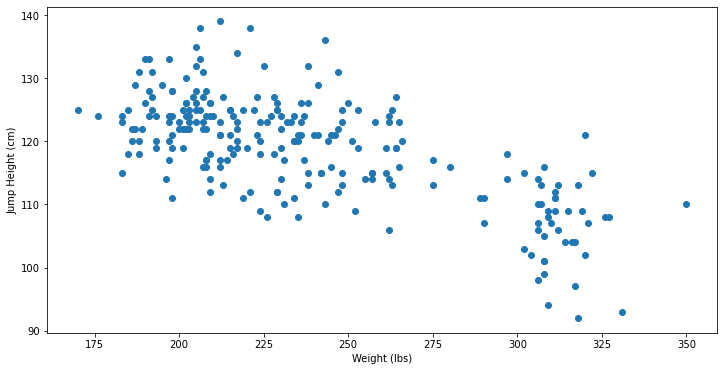

In [7]:
# Scatter plot
fig, ax = plt.subplots(figsize = (12,6))
plt.scatter(x,y)
plt.xlabel('Weight (lbs)')
plt.ylabel("Jump Height (cm)")

So here I can see that the data points are indicating a negative relationship between these two variables as the data points are on a downward trajectory from the top left to the bottom right of the plot. Or as the weight of a player increases, the shorter the jump tends to get.

Below I will use the linregress tool in scipy to get the pvalue of the data[[2]]('https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html'). This is to prove that the values of a players weight (x) is directly related to the players broadjump.  
The linregress function in the scipy.stats module is a convenient tool for performing linear regression analysis on a set of data points, it calculates several important parameters of the linear regression model, including the slope, intercept, correlation coefficient (r-value), p-value, and standard error.

In [8]:
res = ss.linregress(x, y)
print (res)

LinregressResult(slope=-0.13852410700081397, intercept=151.89883891940303, rvalue=-0.6900714858660851, pvalue=3.930794374293921e-35, stderr=0.009437140221157788, intercept_stderr=2.28167911217884)


After performing the linear regression analysis, the linregress function returns a LinregressResult object, which contains several statistical values that describe the linear regression model. Here I will go through some of the results we will use in our model. 

**pvalue:** This is the p-value associated with the null hypothesis that there is no significant linear relationship between the variables x and y. A small p-value (usually less than 0.05) indicates that the linear relationship is statistically significant. In the output, the pvalue is approximately 3.930794374293921e-35, which is extremely small (almost 0) and suggests a highly significant linear relationship.(This is not actually used in the model but the miniscule score gives creedence to generating a model.)

**slope:** This is the slope of the linear regression line, which represents the change in the dependent variable (y) for a unit change in the independent variable (x). In the output, the slope is approximately -0.1385.

**intercept:** This is the intercept of the linear regression line, which is the value of the dependent variable (y) when the independent variable (x) is zero. In the output, the intercept is approximately 151.8988.

Now using the results above I will create a the preditive data to fit the line.

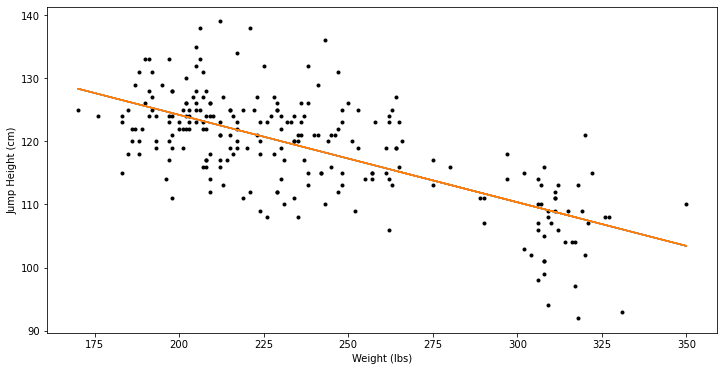

In [9]:
# Creating predictive data
y_pred = res.intercept + res.slope * np.array(x)

# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')

# PLot x and predictive data(y_pred) on x
ax.plot(x, y_pred)

# x and y axis labels
plt.xlabel('Weight (lbs)')
plt.ylabel("Jump Height (cm)")

ax.plot(x,y_pred)

### Linear Regression using the polyfit function
Below I will do the same thing, except this time instead of creating a formula to fit the line, I will ask they polyfit function in the scipy library to do this for me. 

In [10]:
# To use the polyfit function the data needs to be in numpy arrays
x = np.asarray(x)
y = np.asarray(y)

# use x and y to find original parameters used to create data
params = np.polyfit(x, y, 1)
params

array([-1.38524107e-01,  1.51898839e+02])

The first value -1.38524107e-01  is the slope of the linear regression line. This value indicates the rate of change of the dependent variable (y) with respect to a unit change in the independent variable (x). In this case, as expected since we saw this above, the negative value suggests a negative correlation between x and y, meaning that as x increases, y tends to decrease.

The second value 1.51898839e+02 is the intercept of the linear regression line. It represents the value of the dependent variable (y) when the independent variable (x) is zero. In this case, it suggests that when x is zero, the predicted value of y is approximately 156.36.

The e notation in the values represents scientific notation. For example, 1.38524107e-01 is equivalent to -0.138524107, and 1.51898839e+02 is equivalent to 151.898839.  
You will notice these values are almost identical to the values returned to me when I ran the linregress function in the previous section (the slope and intercept outputs).  

In summary, the params array provided represents the coefficients of the linear regression line that best fits the data points (x, y). 
Both functions are attempting to achieve the same goal—fitting a linear regression line to the data and extracting the slope and intercept of that line. The slight numerical differences in the results might be due to different algorithms or methods used by the linregress and polyfit functions to perform the regression, but the essence of what they are doing is the same.  
The linear equation that describes this relationship is approximately:  
**y=−0.1385x+151.8988**  
This equation represents the best-fit line that has been determined through linear regression using my data. It indicates that for each unit increase in x, y is expected to decrease by approximately 0.1385 units, and when x is 0, y is expected to be approximately 151.8988.
This equation can be used to make predictions based on the given data and the fitted linear model.

Text(0, 0.5, 'Jump Height (cm)')

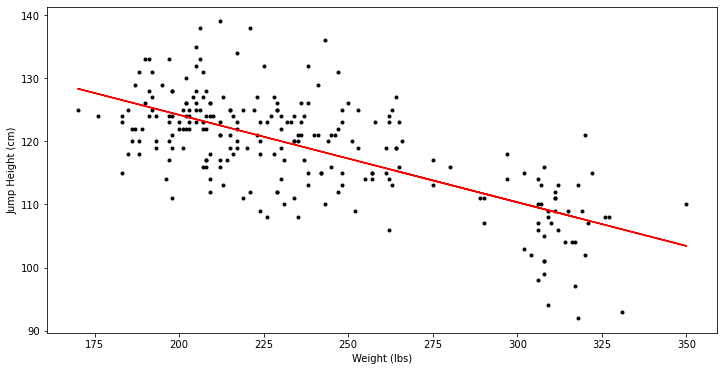

In [11]:
 # Create a plot
fig, ax = plt.subplots(figsize = (12,6))

# PLot x and y
ax.plot(x,y, 'k.')


# PLot x and params on x
ax.plot(x, params[0] * x + params[1], 'r-')

# Labels
plt.xlabel('Weight (lbs)')
plt.ylabel("Jump Height (cm)")



Now realistically some context has to be put on this data. Theses are professional athletes, in the real world with "normal" people who do not train for hours almost every day the data may have a lot more varience. Plus, these are people, there does come a point of diminishing returns where if a person does not weigh enough they will not have the strength or power/energy to jump. In the plot above we may even see that point at roughly 190-200 lbs. If we had a lager sample with lighter athletes, it is very possible that the data would have a more "normal" or bell curve distribution rather than linear.  
Also in a larger sample that includes a broader range of individuals, including those who are not professional athletes, you might see more variation in the data. Again this variation could lead to a more bell-shaped distribution, reflecting the diverse range of physical abilities and training levels in the general population.  
Considering these factors, it's important to remember approach data analysis and modeling with a nuanced understanding of the domain being studying. While linear regression can provide valuable insights, it's not always the best fit for every situation. Exploring alternative models, such as polynomial regression, quadratic regression, or other curve-fitting methods, could help capture more complex relationships that exist in real-world data.

Below I have created a graph that allows a polynomial of degree 3 (It is now a cubic polynomial. 3 is just a default - users can play with this) to the given data points (x, y). This means that the polynomial will have significantly more flexibility and complexity, and it will try to match the fluctuations and details in the data.

In [ ]:
# Degrees of the polynomial(Freedom)
deg = 3

# Use x and y to try to find the original parameters
params = np.polyfit(x, y, deg)

# Create a plot
fig, ax = plt.subplots(figsize = (12,6))

#plot x and y
ax.plot(x, y, 'k.')

# PLot x and params on x
ax.plot(x, np.polyval(params, x), 'b-')

When you increase the degree of the polynomial, it can capture intricate patterns and variations in the data, potentially resulting in a curve that passes very closely to each data point. However, there is a risk of overfitting, which means that the polynomial might capture noise in the data rather than the true underlying trend. This can lead to poor generalization when making predictions on new, unseen data.

The choice of the polynomial degree should be based on the complexity of the underlying relationship in the data and the goals of the analysis. There is a trade-off between fitting the data well and avoiding overfitting. In many cases, lower-degree polynomials are preferred to avoid overfitting, unless there is strong justification for using a higher degree polynomial. In the investigation I have done above into the relationship between an athleates weight and length of broad jump we can see how expanding the degrees of the polynomial gives a lot of "freedom" and the plot becomse gibberish very quickly. In my opinion the straight line gives the best "fit" in this case. 





